# Introduction to Artificial Neural Networks with tf.keras

## Prerequisites

1.	Install Python.
2.	Install TensorFlow.
3.	Install a Python IDE. 
    - We will be using Jupyter Notebook in this course.
4.	Install HDF5 and h5py to have the ability to save tf.keras models to disk.
5.	tf.keras is both CPU and GPU compatible. 
    - A GPU is not required for the course.
    - If using a GPU, you will need to set up the GPU according to the steps provided in an <a href="https://deeplizard.com/learn/video/IubEtS2JAiY">earlier episode</a>.
7.  If you are brand new to deep learning, then it is recommended that you start with our <a href="https://deeplizard.com/learn/playlist/PLZbbT5o_s2xq7LwI2y8_QtvuXZedL6tQU">Deep Learning Fundamentals course</a> first.

## Data Preparation and Processing

In [1]:
import numpy as np
from random import randint
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler

In [2]:
train_labels =  []
train_samples = []

Example data: 
- An experiemental drug was tested on individuals from ages 13 to 100 in a clinical trial. 
- The trial had 2100 participants. Half were under 65 years old, half were 65 years or older.
- Around 95% of patients 65 or older experienced side effects.
- Around 95% of patients under 65 experienced no side effects.

In [3]:
for i in range(50):
    # The ~5% of younger individuals who did experience side effects
    random_younger = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(1)
    
    # The ~5% of older individuals who did not experience side effects
    random_older = randint(65,100)
    train_samples.append(random_older)
    train_labels.append(0)

for i in range(1000):
    # The ~95% of younger individuals who did not experience side effects
    random_younger = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(0)
    
    # The ~95% of older individuals who did experience side effects
    random_older = randint(65,100)
    train_samples.append(random_older)
    train_labels.append(1)

In [4]:
for i in train_samples:
    print(i)

15
69
41
67
64
73
18
73
33
91
43
85
47
76
20
98
41
71
51
69
37
100
62
88
34
73
55
80
22
86
37
99
39
65
25
90
28
76
51
71
52
75
18
86
36
88
41
94
59
77
34
88
55
68
39
68
57
88
57
97
54
94
14
78
49
76
34
98
39
87
22
85
24
83
29
74
56
84
35
86
34
92
29
69
45
99
30
84
21
77
51
99
53
98
36
92
58
66
46
83
56
81
15
72
36
68
19
87
16
98
46
66
18
99
45
91
63
80
28
67
42
83
13
72
30
66
63
65
61
95
14
74
51
93
28
98
17
82
17
69
38
69
39
94
54
100
41
81
13
93
21
83
46
96
56
74
50
67
19
97
45
100
39
100
47
65
56
66
24
88
39
93
14
93
30
69
46
84
51
70
50
90
46
81
48
90
41
67
26
69
30
82
46
95
32
71
44
94
45
92
50
77
34
89
46
83
62
96
43
97
27
87
30
85
37
98
37
67
51
83
51
70
14
95
57
67
25
93
30
74
58
100
15
74
51
92
55
71
57
73
47
89
62
89
46
95
50
66
28
77
26
85
13
86
59
87
20
75
36
100
27
65
17
94
17
89
59
93
19
77
36
67
14
77
64
91
16
84
58
90
33
98
40
81
28
95
64
80
57
68
31
90
40
83
14
92
47
77
29
77
23
95
28
81
33
100
14
67
60
74
28
69
30
74
64
93
34
86
21
85
15
96
61
82
30
73
53
74
38
66
28


In [5]:
for i in train_labels:
    print(i)

1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1


In [6]:
train_labels = np.array(train_labels)
train_samples = np.array(train_samples)
train_labels, train_samples = shuffle(train_labels, train_samples)

In [7]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_train_samples = scaler.fit_transform(train_samples.reshape(-1,1))

In [8]:
for i in scaled_train_samples:
    print(i)

[0.57471264]
[0.1954023]
[0.88505747]
[0.4137931]
[0.65517241]
[0.36781609]
[0.29885057]
[0.50574713]
[0.24137931]
[0.04597701]
[0.87356322]
[0.70114943]
[0.79310345]
[0.34482759]
[0.18390805]
[0.47126437]
[0.01149425]
[0.48275862]
[0.28735632]
[0.10344828]
[0.40229885]
[0.40229885]
[0.1954023]
[0.95402299]
[0.25287356]
[0.65517241]
[0.85057471]
[0.45977011]
[0.79310345]
[0.66666667]
[0.83908046]
[0.77011494]
[0.42528736]
[0.70114943]
[0.18390805]
[0.18390805]
[0.43678161]
[0.72413793]
[0.3908046]
[0.45977011]
[0.71264368]
[1.]
[0.34482759]
[0.26436782]
[0.50574713]
[1.]
[0.13793103]
[0.4137931]
[0.81609195]
[0.24137931]
[0.64367816]
[0.37931034]
[0.71264368]
[0.25287356]
[0.17241379]
[0.81609195]
[0.88505747]
[0.75862069]
[0.96551724]
[0.49425287]
[0.49425287]
[0.85057471]
[0.82758621]
[0.81609195]
[0.47126437]
[0.17241379]
[0.63218391]
[0.01149425]
[0.81609195]
[0.88505747]
[0.71264368]
[0.49425287]
[0.70114943]
[0.43678161]
[0.96551724]
[0.3908046]
[0.8045977]
[0.91954023]
[0.321839

[0.68965517]
[0.95402299]
[0.]
[0.82758621]
[0.18390805]
[0.87356322]
[0.20689655]
[0.4137931]
[0.95402299]
[0.42528736]
[0.73563218]
[0.64367816]
[0.74712644]
[0.]
[0.89655172]
[0.90804598]
[0.86206897]
[0.93103448]
[0.01149425]
[0.03448276]
[0.95402299]
[0.8045977]
[0.01149425]
[0.45977011]
[0.40229885]
[0.14942529]
[0.65517241]
[0.95402299]
[0.98850575]
[0.8045977]
[0.73563218]
[0.87356322]
[0.74712644]
[0.44827586]
[0.90804598]
[0.02298851]
[0.29885057]
[0.98850575]
[0.55172414]
[0.72413793]
[0.42528736]
[0.56321839]
[0.77011494]
[0.85057471]
[0.79310345]
[0.97701149]
[0.59770115]
[0.49425287]
[0.66666667]
[0.71264368]
[0.75862069]
[0.91954023]
[0.49425287]
[0.5862069]
[0.32183908]
[0.27586207]
[0.6091954]
[0.52873563]
[0.66666667]
[0.88505747]
[0.97701149]
[0.59770115]
[0.01149425]
[0.95402299]
[0.56321839]
[0.71264368]
[0.28735632]
[0.67816092]
[0.4137931]
[0.74712644]
[0.97701149]
[0.70114943]
[0.20689655]
[0.48275862]
[0.94252874]
[0.7816092]
[0.34482759]
[0.81609195]
[0.678160

[0.71264368]
[0.4137931]
[0.10344828]
[0.96551724]
[0.08045977]
[0.81609195]
[0.45977011]
[0.25287356]
[0.09195402]
[0.3908046]
[0.90804598]
[0.86206897]
[0.09195402]
[0.06896552]
[0.64367816]
[1.]
[0.10344828]
[0.87356322]
[0.18390805]
[0.65517241]
[0.10344828]
[0.59770115]
[0.08045977]
[0.13793103]
[0.96551724]
[0.73563218]
[0.42528736]
[0.36781609]
[0.09195402]
[0.95402299]
[0.42528736]
[0.86206897]
[0.16091954]
[0.52873563]
[0.52873563]
[0.67816092]
[0.75862069]
[0.93103448]
[0.42528736]
[0.3908046]
[0.17241379]
[0.89655172]
[0.]
[0.75862069]
[0.64367816]
[0.37931034]
[0.13793103]
[0.68965517]
[0.86206897]
[0.3908046]
[0.62068966]
[0.68965517]
[0.13793103]
[0.98850575]
[0.34482759]
[0.71264368]
[0.37931034]
[0.28735632]
[0.40229885]
[0.18390805]
[0.25287356]
[0.]
[0.6091954]
[0.03448276]
[0.26436782]
[0.59770115]
[0.85057471]
[0.03448276]
[0.5862069]
[0.5862069]
[0.14942529]
[0.27586207]
[0.75862069]
[0.95402299]
[0.94252874]
[0.82758621]
[0.94252874]
[0.]
[0.26436782]
[0.6091954]


## Simple tf.keras Sequential Model


In [9]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy

In [10]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print("Num GPUs Available: ", len(physical_devices))
tf.config.experimental.set_memory_growth(physical_devices[0], True)

Num GPUs Available:  1


In [11]:
model = Sequential([
    Dense(units=16, input_shape=(1,), activation='relu'),
    Dense(units=32, activation='relu'),
    Dense(units=2, activation='softmax')
])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                32        
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
)

In [14]:
model.fit(x=scaled_train_samples,
          y=train_labels, validation_split=0.1,
          batch_size=10,
          epochs=30,
          shuffle=True,
          verbose=2
)

Epoch 1/30
189/189 - 0s - loss: 0.6508 - accuracy: 0.5455 - val_loss: 0.6433 - val_accuracy: 0.5810
Epoch 2/30
189/189 - 0s - loss: 0.6217 - accuracy: 0.6481 - val_loss: 0.6159 - val_accuracy: 0.6524
Epoch 3/30
189/189 - 0s - loss: 0.5937 - accuracy: 0.6958 - val_loss: 0.5906 - val_accuracy: 0.6905
Epoch 4/30
189/189 - 0s - loss: 0.5660 - accuracy: 0.7233 - val_loss: 0.5625 - val_accuracy: 0.7238
Epoch 5/30
189/189 - 0s - loss: 0.5336 - accuracy: 0.7762 - val_loss: 0.5292 - val_accuracy: 0.7952
Epoch 6/30
189/189 - 0s - loss: 0.5030 - accuracy: 0.8148 - val_loss: 0.5021 - val_accuracy: 0.8238
Epoch 7/30
189/189 - 0s - loss: 0.4757 - accuracy: 0.8429 - val_loss: 0.4770 - val_accuracy: 0.8524
Epoch 8/30
189/189 - 0s - loss: 0.4499 - accuracy: 0.8524 - val_loss: 0.4530 - val_accuracy: 0.8714
Epoch 9/30
189/189 - 0s - loss: 0.4262 - accuracy: 0.8693 - val_loss: 0.4314 - val_accuracy: 0.8714
Epoch 10/30
189/189 - 0s - loss: 0.4046 - accuracy: 0.8788 - val_loss: 0.4113 - val_accuracy: 0.8857

In [15]:
assert model.history.history.get('accuracy')[-1] > 0.90
assert model.history.history.get('val_accuracy')[-1] > 0.90

## Preprocess Test Data

In [16]:
test_labels =  []
test_samples = []

In [17]:
for i in range(10):
    # The 5% of younger individuals who did experience side effects
    random_younger = randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(1)
    
    # The 5% of older individuals who did not experience side effects
    random_older = randint(65,100)
    test_samples.append(random_older)
    test_labels.append(0)

for i in range(200):
    # The 95% of younger individuals who did not experience side effects
    random_younger = randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(0)
    
    # The 95% of older individuals who did experience side effects
    random_older = randint(65,100)
    test_samples.append(random_older)
    test_labels.append(1)

In [18]:
test_labels = np.array(test_labels)
test_samples = np.array(test_samples)
test_labels, test_samples = shuffle(test_labels, test_samples)

In [19]:
scaled_test_samples = scaler.fit_transform(test_samples.reshape(-1,1))

## Predict

In [20]:
predictions = model.predict(x=scaled_test_samples, batch_size=10, verbose=0) 

In [21]:
for i in predictions:
    print(i)

[0.95855147 0.04144857]
[0.05556071 0.9444393 ]
[0.7489354  0.25106457]
[0.5789001 0.4210999]
[0.95903826 0.04096171]
[0.95648926 0.04351067]
[0.16541912 0.8345809 ]
[0.9590725 0.0409275]
[0.92206603 0.07793397]
[0.10575049 0.89424956]
[0.30074242 0.69925755]
[0.6973509  0.30264905]
[0.6402588 0.3597412]
[0.9527331  0.04726691]
[0.66942847 0.3305716 ]
[0.949877   0.05012304]
[0.5789001 0.4210999]
[0.03766983 0.96233016]
[0.9590725 0.0409275]
[0.9590896 0.0409104]
[0.9584379  0.04156205]
[0.95853055 0.04146942]
[0.14835511 0.85164493]
[0.0743134 0.9256866]
[0.24936673 0.75063324]
[0.9588073  0.04119274]
[0.7943208  0.20567915]
[0.92206603 0.07793397]
[0.92206603 0.07793397]
[0.95903826 0.04096171]
[0.88045424 0.11954572]
[0.02425906 0.97574097]
[0.047332   0.95266795]
[0.0743134 0.9256866]
[0.14835511 0.85164493]
[0.16541912 0.8345809 ]
[0.9583452  0.04165486]
[0.09414726 0.9058528 ]
[0.9468243  0.05317566]
[0.6100145  0.38998547]
[0.0743134 0.9256866]
[0.958899   0.04110091]
[0.0405102

In [22]:
rounded_predictions = np.argmax(predictions, axis=-1)

In [23]:
for i in rounded_predictions:
    print(i)

0
1
0
0
0
0
1
0
0
1
1
0
0
0
0
0
0
1
0
0
0
0
1
1
1
0
0
0
0
0
0
1
1
1
1
1
0
1
0
0
1
0
1
1
0
0
1
1
1
0
1
1
0
0
0
1
0
0
0
1
1
0
0
1
1
1
1
1
0
0
1
0
1
0
1
0
0
1
0
1
0
0
1
0
0
0
1
0
1
1
0
0
0
1
1
1
0
1
1
0
1
1
1
0
0
0
0
0
0
1
0
0
1
0
1
1
0
0
1
0
1
0
0
1
1
1
0
1
0
1
1
1
0
0
1
0
1
1
1
0
1
0
1
0
0
1
1
0
0
1
0
1
0
1
0
1
0
0
1
0
1
0
1
0
0
0
0
1
0
0
0
1
0
0
0
1
1
1
1
0
0
1
1
1
0
0
1
1
0
0
1
1
1
1
1
0
0
0
0
1
1
1
1
1
1
1
1
1
1
0
0
0
0
1
1
0
1
1
0
1
1
1
1
0
1
0
0
1
0
1
0
0
0
1
1
0
0
0
0
0
0
1
1
0
0
1
1
1
0
1
1
1
0
1
0
1
0
0
1
1
1
1
0
0
0
1
1
1
1
1
0
1
1
0
0
0
0
0
1
0
0
0
0
0
0
1
0
0
0
1
0
0
1
1
1
1
0
0
0
1
0
0
0
1
0
1
1
1
1
0
1
0
1
0
1
1
1
1
1
0
0
1
0
1
0
1
0
1
1
1
0
1
0
1
1
0
0
1
1
0
0
0
0
1
1
1
1
1
0
1
0
1
1
1
0
1
0
0
1
0
0
1
0
1
0
1
0
0
0
0
0
1
0
1
0
1
0
1
1
1
0
1
1
1
1
1
1
1
1
1
1
0
1
0
1
0
1
0
1
1
1
0
0
1
1
0
1
1
0
1
0
0
1
0
1
1
1
0
1
1


## Confusion Matrix

In [24]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [25]:
cm = confusion_matrix(y_true=test_labels, y_pred=rounded_predictions)

In [26]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[197  13]
 [ 10 200]]


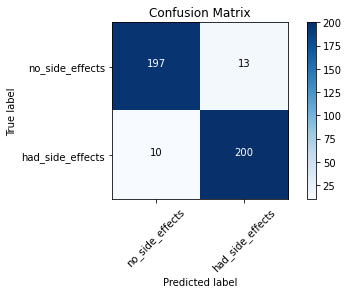

In [27]:
cm_plot_labels = ['no_side_effects','had_side_effects']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

## Save and Load a Model

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                32        
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


### 1. model.save()

In [29]:
# Checks first to see if file exists already.
# If not, the model is saved to disk.
import os.path
if os.path.isfile('models/medical_trial_model.h5') is False:
    model.save('models/medical_trial_model.h5')

This save functions saves:
- The architecture of the model, allowing to re-create the model.
- The weights of the model.
- The training configuration (loss, optimizer).
- The state of the optimizer, allowing to resume training exactly where you left off.


In [30]:
from tensorflow.keras.models import load_model
new_model = load_model('models/medical_trial_model.h5')

In [31]:
new_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                32        
_________________________________________________________________
dense_2 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [32]:
new_model.get_weights()

[array([[ 0.66041297, -0.42287597,  0.70743144,  0.22229029, -0.0230478 ,
          0.3464646 , -0.37161654, -0.4364695 , -0.136868  , -0.15265298,
         -0.06606877,  0.24787427,  0.23808615,  0.4033957 , -0.08289272,
         -0.09918111]], dtype=float32),
 array([-0.10995001,  0.        , -0.01893946, -0.02880946,  0.        ,
         0.01607688,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        , -0.06091552, -0.07365988, -0.06915655,  0.        ,
         0.18119639], dtype=float32),
 array([[-0.3063565 , -0.02353648, -0.44076058,  0.01424379,  0.5295122 ,
          0.08212426, -0.269985  ,  0.4198937 ,  0.25303566, -0.23696692,
          0.07007609, -0.31789744, -0.3377205 , -0.21514373, -0.47499824,
         -0.50285876,  0.3799069 ,  0.4336587 ,  0.4823647 ,  0.07718739,
          0.1960525 ,  0.407256  ,  0.36644128,  0.1264907 ,  0.03140691,
         -0.36819023,  0.39242253, -0.26468584,  0.03569502, -0.24895464,
          0.51035416, -0.14360958],
 

In [33]:
new_model.optimizer

### 2. model.to_json()

If you only need to save the architecture of a model, and not its weights or its training configuration, you can use the following function to save the architecture only.

In [34]:
# save as JSON
json_string = model.to_json()

# save as YAML
# yaml_string = model.to_yaml()

In [35]:
json_string

'{"class_name": "Sequential", "config": {"name": "sequential", "layers": [{"class_name": "Dense", "config": {"name": "dense", "trainable": true, "batch_input_shape": [null, 1], "dtype": "float32", "units": 16, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "Dense", "config": {"name": "dense_1", "trainable": true, "dtype": "float32", "units": 32, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "Dense", "config": {"name": "dens

In [36]:
# model reconstruction from JSON:
from tensorflow.keras.models import model_from_json
model_architecture = model_from_json(json_string)

# model reconstruction from YAML
# from tensorflow.keras.models import model_from_yaml
# model = model_from_yaml(yaml_string)

In [37]:
model_architecture.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                32        
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


### 3. model.save_weights()

If you only need to save the weights of a model, you can use the following function save the weights only.

In [38]:
# Checks first to see if file exists already.
# If not, the weights are saved to disk.
import os.path
if os.path.isfile('models/my_model_weights.h5') is False:
    model.save_weights('models/my_model_weights.h5')

In [39]:
model2 = Sequential([
    Dense(units=16, input_shape=(1,), activation='relu'),
    Dense(units=32, activation='relu'),
    Dense(units=2, activation='softmax')
])

In [40]:
model2.load_weights('models/my_model_weights.h5')

In [41]:
model2.get_weights()

[array([[ 0.66041297, -0.42287597,  0.70743144,  0.22229029, -0.0230478 ,
          0.3464646 , -0.37161654, -0.4364695 , -0.136868  , -0.15265298,
         -0.06606877,  0.24787427,  0.23808615,  0.4033957 , -0.08289272,
         -0.09918111]], dtype=float32),
 array([-0.10995001,  0.        , -0.01893946, -0.02880946,  0.        ,
         0.01607688,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        , -0.06091552, -0.07365988, -0.06915655,  0.        ,
         0.18119639], dtype=float32),
 array([[-0.3063565 , -0.02353648, -0.44076058,  0.01424379,  0.5295122 ,
          0.08212426, -0.269985  ,  0.4198937 ,  0.25303566, -0.23696692,
          0.07007609, -0.31789744, -0.3377205 , -0.21514373, -0.47499824,
         -0.50285876,  0.3799069 ,  0.4336587 ,  0.4823647 ,  0.07718739,
          0.1960525 ,  0.407256  ,  0.36644128,  0.1264907 ,  0.03140691,
         -0.36819023,  0.39242253, -0.26468584,  0.03569502, -0.24895464,
          0.51035416, -0.14360958],
 

# Convolutional Neural Networks

In [42]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

In [43]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print("Num GPUs Available: ", len(physical_devices))
tf.config.experimental.set_memory_growth(physical_devices[0], True)

Num GPUs Available:  1


## Data preparation

The images included in the data/cats-and-dogs directory are a random subset of the full cat and dog data set from the following Kaggle competition:
https://www.kaggle.com/c/dogs-vs-cats/data

In [44]:
# Organize data into train, valid, test dirs
os.chdir('data/dogs-vs-cats')
if os.path.isdir('train/dog') is False:
    os.makedirs('train/dog')
    os.makedirs('train/cat')
    os.makedirs('valid/dog')
    os.makedirs('valid/cat')
    os.makedirs('test/dog')
    os.makedirs('test/cat')
    
    for c in random.sample(glob.glob('cat*'), 500):
        shutil.move(c, 'train/cat'  )      
    for c in random.sample(glob.glob('dog*'), 500):
        shutil.move(c, 'train/dog')
    for c in random.sample(glob.glob('cat*'), 100):
        shutil.move(c, 'valid/cat')        
    for c in random.sample(glob.glob('dog*'), 100):
        shutil.move(c, 'valid/dog')
    for c in random.sample(glob.glob('cat*'), 50):
        shutil.move(c, 'test/cat')      
    for c in random.sample(glob.glob('dog*'), 50):
        shutil.move(c, 'test/dog')

os.chdir('../../')

In [45]:
train_path = 'data/dogs-vs-cats/train'
valid_path = 'data/dogs-vs-cats/valid'
test_path = 'data/dogs-vs-cats/test'

In [46]:
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=train_path, target_size=(224,224), classes=['cat', 'dog'], batch_size=10)

valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=valid_path, target_size=(224,224), classes=['cat', 'dog'], batch_size=10)

test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=test_path, target_size=(224,224), classes=['cat', 'dog'], batch_size=10, shuffle=False)

Found 1000 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [47]:
assert train_batches.n == 1000
assert valid_batches.n == 200
assert test_batches.n == 100
assert train_batches.num_classes == valid_batches.num_classes == test_batches.num_classes == 2

In [48]:
imgs, labels = next(train_batches)

In [49]:
# This function will plot images in the form of a grid with 1 row and 10 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

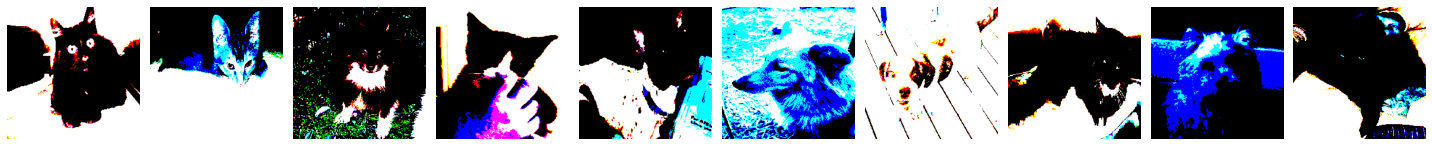

[[1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]]


In [50]:
plotImages(imgs)
print(labels)

## Build and train a CNN

In [51]:
model = Sequential([
        Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding = 'same', input_shape=(224,224,3)),
        MaxPool2D(pool_size=(2, 2), strides=2),
        Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'),
        MaxPool2D(pool_size=(2, 2), strides=2),
        Flatten(),
        Dense(units=2, activation='softmax'),
])

In [52]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 200704)            0         
_________________________________________________________________
dense_6 (Dense)              (None, 2)                 401410    
Total params: 420,802
Trainable params: 420,802
Non-trainable params: 0
________________________________________________

In [53]:
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy']
)

In [54]:
model.fit(x=train_batches,
          steps_per_epoch=len(train_batches),
          validation_data=valid_batches,
          validation_steps=len(valid_batches),
          epochs=10,
          verbose=2
)

Epoch 1/10
100/100 - 4s - loss: 17.5408 - accuracy: 0.5700 - val_loss: 3.4661 - val_accuracy: 0.6450
Epoch 2/10
100/100 - 4s - loss: 2.2883 - accuracy: 0.7430 - val_loss: 3.1805 - val_accuracy: 0.6350
Epoch 3/10
100/100 - 4s - loss: 0.5853 - accuracy: 0.8770 - val_loss: 3.0907 - val_accuracy: 0.6950
Epoch 4/10
100/100 - 3s - loss: 0.1166 - accuracy: 0.9620 - val_loss: 2.9812 - val_accuracy: 0.6500
Epoch 5/10
100/100 - 3s - loss: 0.0746 - accuracy: 0.9710 - val_loss: 1.9187 - val_accuracy: 0.7500
Epoch 6/10
100/100 - 3s - loss: 0.0099 - accuracy: 0.9970 - val_loss: 2.9080 - val_accuracy: 0.6400
Epoch 7/10
100/100 - 4s - loss: 0.0042 - accuracy: 0.9990 - val_loss: 1.9011 - val_accuracy: 0.6700
Epoch 8/10
100/100 - 4s - loss: 6.2969e-04 - accuracy: 1.0000 - val_loss: 1.5748 - val_accuracy: 0.7200
Epoch 9/10
100/100 - 4s - loss: 3.9268e-04 - accuracy: 1.0000 - val_loss: 2.1236 - val_accuracy: 0.6550
Epoch 10/10
100/100 - 3s - loss: 3.2493e-04 - accuracy: 1.0000 - val_loss: 1.9761 - val_acc

## Predict

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

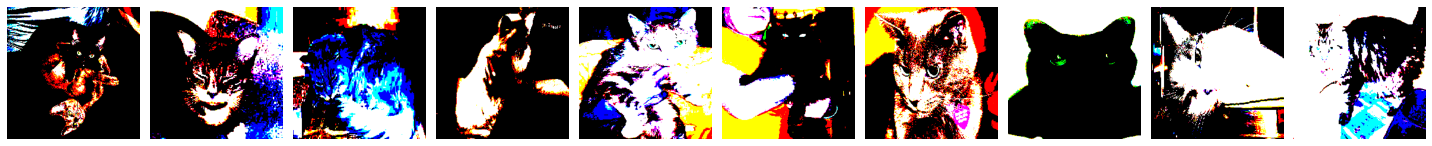

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [55]:
test_imgs, test_labels = next(test_batches)
plotImages(test_imgs)
print(test_labels)

In [56]:
test_batches.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [57]:
predictions = model.predict(x=test_batches, steps=len(test_batches), verbose=0)

In [58]:
np.round(predictions)

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.

In [59]:
cm = confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(predictions, axis=-1))

In [60]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [61]:
test_batches.class_indices

{'cat': 0, 'dog': 1}

Confusion matrix, without normalization
[[24 26]
 [24 26]]


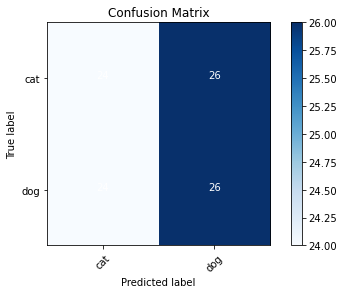

In [62]:
cm_plot_labels = ['cat','dog']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

## Build Fine-tuned VGG16 model

In [63]:
# Download model - Internet connection needed
vgg16_model = tf.keras.applications.vgg16.VGG16()

In [64]:
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [65]:
def count_params(model):
    non_trainable_params = np.sum([np.prod(v.get_shape().as_list()) for v in model.non_trainable_weights])
    trainable_params = np.sum([np.prod(v.get_shape().as_list()) for v in model.trainable_weights])
    return {'non_trainable_params': non_trainable_params, 'trainable_params': trainable_params}

In [66]:
params = count_params(vgg16_model)
assert params['non_trainable_params'] == 0
assert params['trainable_params'] == 138357544

In [67]:
type(vgg16_model)

tensorflow.python.keras.engine.training.Model

In [68]:
model = Sequential()
for layer in vgg16_model.layers[:-1]:
    model.add(layer)

In [69]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [70]:
params = count_params(model)
assert params['non_trainable_params'] == 0
assert params['trainable_params'] == 134260544

In [71]:
for layer in model.layers:
    layer.trainable = False

In [72]:
model.add(Dense(units=2, activation='softmax'))

In [73]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [74]:
params = count_params(model)
assert params['non_trainable_params'] == 134260544
assert params['trainable_params'] == 8194

## Train the fine-tuned VGG16 model

In [75]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [76]:
model.fit(x=train_batches,
          steps_per_epoch=len(train_batches),
          validation_data=valid_batches,
          validation_steps=len(valid_batches),
          epochs=5,
          verbose=2
)

Epoch 1/5
100/100 - 7s - loss: 0.3979 - accuracy: 0.8340 - val_loss: 0.1742 - val_accuracy: 0.9250
Epoch 2/5
100/100 - 7s - loss: 0.0975 - accuracy: 0.9670 - val_loss: 0.1040 - val_accuracy: 0.9650
Epoch 3/5
100/100 - 7s - loss: 0.0606 - accuracy: 0.9830 - val_loss: 0.1441 - val_accuracy: 0.9450
Epoch 4/5
100/100 - 7s - loss: 0.0429 - accuracy: 0.9890 - val_loss: 0.0687 - val_accuracy: 0.9750
Epoch 5/5
100/100 - 7s - loss: 0.0333 - accuracy: 0.9950 - val_loss: 0.0783 - val_accuracy: 0.9650


In [77]:
assert model.history.history.get('accuracy')[-1] > 0.95

## Predict using fine-tuned VGG16 model

In [78]:
predictions = model.predict(x=test_batches, steps= len(test_batches), verbose=0)

In [79]:
test_batches.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [80]:
cm = confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(predictions, axis=-1))

In [81]:
test_batches.class_indices

{'cat': 0, 'dog': 1}

Confusion matrix, without normalization
[[28 22]
 [20 30]]


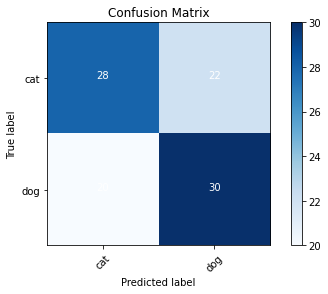

In [82]:
cm_plot_labels = ['cat','dog']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

# MobileNet

In [83]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.applications import imagenet_utils
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [84]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print("Num GPUs Available: ", len(physical_devices))
tf.config.experimental.set_memory_growth(physical_devices[0], True)

Num GPUs Available:  1


In [85]:
mobile = tf.keras.applications.mobilenet.MobileNet()

In [86]:
def prepare_image(file):
    img_path = 'data/MobileNet-samples/'
    img = image.load_img(img_path + file, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array_expanded_dims = np.expand_dims(img_array, axis=0)
    return tf.keras.applications.mobilenet.preprocess_input(img_array_expanded_dims)

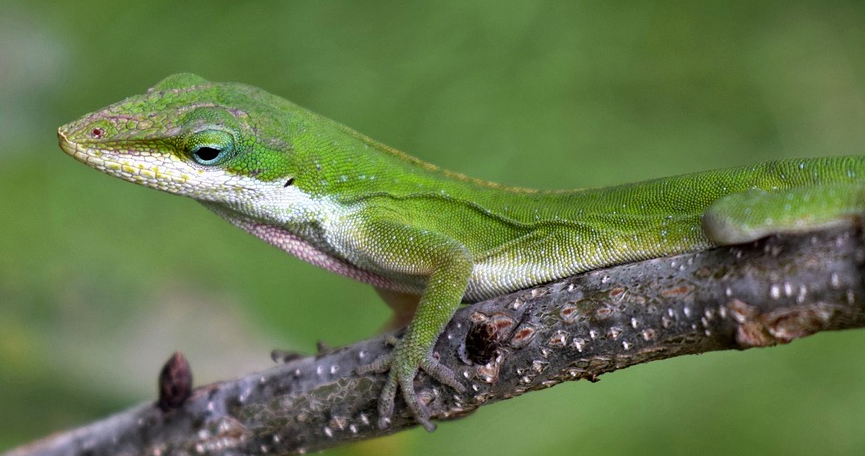

In [87]:
from IPython.display import Image
Image(filename='data/MobileNet-samples/1.PNG', width=300,height=200) 

In [88]:
preprocessed_image = prepare_image('1.PNG')
predictions = mobile.predict(preprocessed_image)
results = imagenet_utils.decode_predictions(predictions)
results

[[('n01682714', 'American_chameleon', 0.5843147),
  ('n01693334', 'green_lizard', 0.2785562),
  ('n01687978', 'agama', 0.13019584),
  ('n01689811', 'alligator_lizard', 0.0047072913),
  ('n01688243', 'frilled_lizard', 0.0016176497)]]

In [89]:
assert results[0][0][1] == 'American_chameleon'

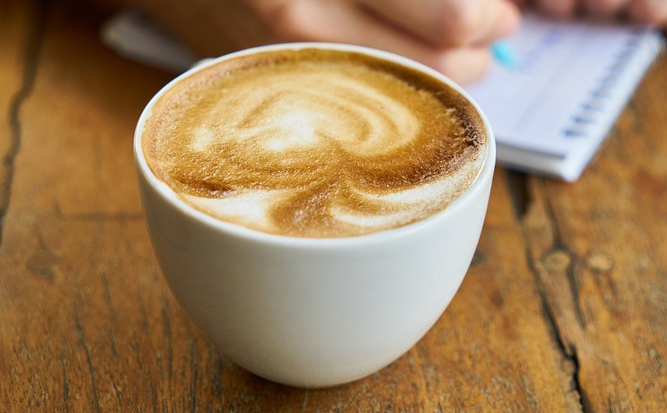

In [90]:
Image(filename='data/MobileNet-samples/2.PNG', width=300,height=200) 

In [91]:
preprocessed_image = prepare_image('2.PNG')
predictions = mobile.predict(preprocessed_image)
results = imagenet_utils.decode_predictions(predictions)
results

[[('n07920052', 'espresso', 0.9867621),
  ('n07930864', 'cup', 0.0068946183),
  ('n07932039', 'eggnog', 0.0028749541),
  ('n03063599', 'coffee_mug', 0.0021079157),
  ('n04597913', 'wooden_spoon', 0.0010108481)]]

In [92]:
assert results[0][0][1] == 'espresso'

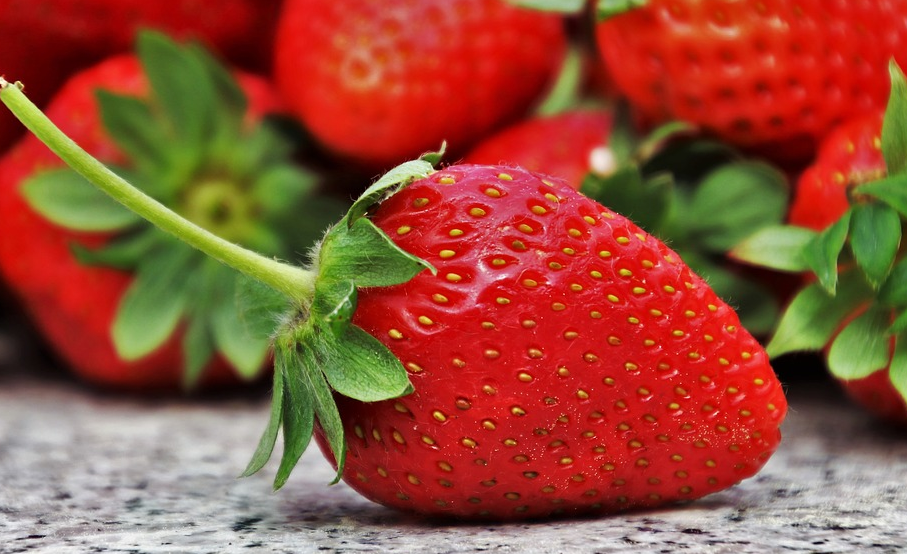

In [93]:
Image(filename='data/MobileNet-samples/3.PNG', width=300,height=200) 

In [94]:
preprocessed_image = prepare_image('3.PNG')
predictions = mobile.predict(preprocessed_image)
results = imagenet_utils.decode_predictions(predictions)
results

[[('n07745940', 'strawberry', 0.9999896),
  ('n07749582', 'lemon', 2.4314522e-06),
  ('n07747607', 'orange', 1.7603447e-06),
  ('n07768694', 'pomegranate', 1.5602129e-06),
  ('n07753275', 'pineapple', 8.5766914e-07)]]

In [95]:
assert results[0][0][1] == 'strawberry'

## Fine-tune MobileNet on cats and dogs

### Image preparation

The images included in the data/cats-and-dogs directory are a random subset of the full cat and dog data set from the following Kaggle competition: https://www.kaggle.com/c/dogs-vs-cats/data

In [96]:
train_path = 'data/dogs-vs-cats/train'
valid_path = 'data/dogs-vs-cats/valid'
test_path = 'data/dogs-vs-cats/test'

In [97]:
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=train_path, target_size=(224,224), batch_size=10)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=valid_path, target_size=(224,224), batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=test_path, target_size=(224,224), batch_size=10, shuffle=False)

Found 1000 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [98]:
assert train_batches.n == 1000
assert valid_batches.n == 200
assert test_batches.n == 100
assert train_batches.num_classes == valid_batches.num_classes == test_batches.num_classes == 2

### Modify Model

In [99]:
mobile = tf.keras.applications.mobilenet.MobileNet()

In [100]:
mobile.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32

In [101]:
def count_params(model):
    non_trainable_params = np.sum([np.prod(v.get_shape().as_list()) for v in model.non_trainable_weights])
    trainable_params = np.sum([np.prod(v.get_shape().as_list()) for v in model.trainable_weights])
    return {'non_trainable_params': non_trainable_params, 'trainable_params': trainable_params}

In [102]:
params = count_params(mobile)
assert params['non_trainable_params'] == 21888
assert params['trainable_params'] == 4231976

In [103]:
x = mobile.layers[-6].output
output = Dense(units=2, activation='softmax')(x)
model = Model(inputs=mobile.input, outputs=output)

In [104]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128   

In [105]:
params = count_params(model)
assert params['non_trainable_params'] == 21888
assert params['trainable_params'] == 3209026

In [106]:
for layer in model.layers[:-5]:
    layer.trainable = False

In [107]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128   

In [108]:
params = count_params(model)
assert params['non_trainable_params'] == 2178240
assert params['trainable_params'] == 1052674

### Train the model

In [109]:
model.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [110]:
model.fit(x=train_batches,
          steps_per_epoch=len(train_batches),
          validation_data=valid_batches,
          validation_steps=len(valid_batches),
          epochs=10,
          verbose=2
)

Epoch 1/10
100/100 - 4s - loss: 0.2203 - accuracy: 0.9050 - val_loss: 0.2231 - val_accuracy: 0.8950
Epoch 2/10
100/100 - 3s - loss: 0.0565 - accuracy: 0.9800 - val_loss: 0.0359 - val_accuracy: 0.9850
Epoch 3/10
100/100 - 3s - loss: 0.0475 - accuracy: 0.9860 - val_loss: 0.0297 - val_accuracy: 0.9950
Epoch 4/10
100/100 - 3s - loss: 0.0337 - accuracy: 0.9920 - val_loss: 0.0417 - val_accuracy: 0.9850
Epoch 5/10
100/100 - 4s - loss: 0.0501 - accuracy: 0.9850 - val_loss: 0.0257 - val_accuracy: 0.9900
Epoch 6/10
100/100 - 3s - loss: 0.0239 - accuracy: 0.9940 - val_loss: 0.0224 - val_accuracy: 0.9950
Epoch 7/10
100/100 - 3s - loss: 0.0194 - accuracy: 0.9940 - val_loss: 0.0129 - val_accuracy: 1.0000
Epoch 8/10
100/100 - 4s - loss: 0.0184 - accuracy: 0.9970 - val_loss: 0.0399 - val_accuracy: 0.9900
Epoch 9/10
100/100 - 3s - loss: 0.0104 - accuracy: 0.9980 - val_loss: 0.0288 - val_accuracy: 0.9950
Epoch 10/10
100/100 - 3s - loss: 0.0110 - accuracy: 0.9970 - val_loss: 0.0082 - val_accuracy: 1.0000

In [111]:
assert model.history.history.get('accuracy')[-1] > 0.95

### Predict cats and dogs

In [112]:
test_labels = test_batches.classes

In [113]:
test_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [114]:
test_batches.class_indices

{'cat': 0, 'dog': 1}

In [115]:
predictions = model.predict(x=test_batches, steps=len(test_batches), verbose=0)

In [116]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [117]:
cm = confusion_matrix(y_true=test_labels, y_pred=predictions.argmax(axis=1))

Confusion matrix, without normalization
[[48  2]
 [ 3 47]]


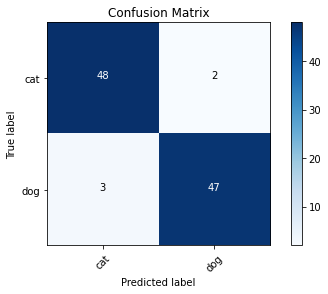

In [118]:
cm_plot_labels = ['cat','dog']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

In [119]:
assert np.sum(test_labels == predictions.argmax(axis=1)) > 8

## Fine-tune MobileNet on sign language digits

### Image preparation

Dataset:
https://github.com/ardamavi/Sign-Language-Digits-Dataset
    
- 10 classes (digits 0-9)
- Class data:

  - class 0: 205 images
  - class 1: 206 images
  - class 2: 206 images
  - class 3: 206 images
  - class 4: 207 images
  - class 5: 207 images
  - class 6: 207 images
  - class 7: 206 images
  - class 8: 208 images
  - class 9: 204 images
  
Download data and save in current directory/data/Sign-Language-Digits-Dataset. Extract sub-directories labeled 0 through 9 and nest directories directly underneath Sign-Language-Digits-Dataset directory. Directory structure should look like this:

- data/
  - Sign-Language-Digits-Dataset/
    - 0/
    - 1/
    - 2/
    - ...
    - 9/

In [120]:
# Organize data into train, valid, test dirs
os.chdir('data/Sign-Language-Digits-Dataset')
if os.path.isdir('train/0/') is False: 
    os.mkdir('train')
    os.mkdir('valid')
    os.mkdir('test')

    for i in range(0, 10):
        shutil.move(f'{i}', 'train')
        os.mkdir(f'valid/{i}')
        os.mkdir(f'test/{i}')

        valid_samples = random.sample(os.listdir(f'train/{i}'), 30)
        for j in valid_samples:
            shutil.move(f'train/{i}/{j}', f'valid/{i}')

        test_samples = random.sample(os.listdir(f'train/{i}'), 5)
        for k in test_samples:
            shutil.move(f'train/{i}/{k}', f'test/{i}')
os.chdir('../..')

In [121]:
for i in range(0, 10):
    assert len(os.listdir(f'data/Sign-Language-Digits-Dataset/valid/{i}')) == 30
    assert len(os.listdir(f'data/Sign-Language-Digits-Dataset/test/{i}')) == 5

In [122]:
train_path = 'data/Sign-Language-Digits-Dataset/train'
valid_path = 'data/Sign-Language-Digits-Dataset/valid'
test_path = 'data/Sign-Language-Digits-Dataset/test'

In [123]:
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=train_path, target_size=(224,224), batch_size=10)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=valid_path, target_size=(224,224), batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=test_path, target_size=(224,224), batch_size=10, shuffle=False)

Found 1712 images belonging to 10 classes.
Found 300 images belonging to 10 classes.
Found 50 images belonging to 10 classes.


In [124]:
assert train_batches.n == 1712
assert valid_batches.n == 300
assert test_batches.n == 50
assert train_batches.num_classes == valid_batches.num_classes == test_batches.num_classes == 10

### Modify Model

In [125]:
mobile = tf.keras.applications.mobilenet.MobileNet()

In [126]:
mobile.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32

In [127]:
params = count_params(mobile)
assert params['non_trainable_params'] == 21888
assert params['trainable_params'] == 4231976

In [128]:
x = mobile.layers[-6].output
output = Dense(units=10, activation='softmax')(x)

In [129]:
model = Model(inputs=mobile.input, outputs=output)

In [130]:
for layer in model.layers[:-23]:
    layer.trainable = False

In [131]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128 

In [132]:
params = count_params(model)
assert params['non_trainable_params'] == 1365184
assert params['trainable_params'] == 1873930

### Train the model

In [133]:
model.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [134]:
# Run for more epochs (~30) to see better results
model.fit(x=train_batches,
          steps_per_epoch=len(train_batches),
          validation_data=valid_batches,
          validation_steps=len(valid_batches),
          epochs=10,
          verbose=2
)

Epoch 1/10
172/172 - 14s - loss: 0.6231 - accuracy: 0.8189 - val_loss: 0.2848 - val_accuracy: 0.9333
Epoch 2/10
172/172 - 4s - loss: 0.1127 - accuracy: 0.9854 - val_loss: 0.1078 - val_accuracy: 0.9600
Epoch 3/10
172/172 - 5s - loss: 0.0624 - accuracy: 0.9901 - val_loss: 0.0982 - val_accuracy: 0.9733
Epoch 4/10
172/172 - 4s - loss: 0.0300 - accuracy: 0.9982 - val_loss: 0.0477 - val_accuracy: 0.9867
Epoch 5/10
172/172 - 4s - loss: 0.0226 - accuracy: 0.9988 - val_loss: 0.0425 - val_accuracy: 0.9933
Epoch 6/10
172/172 - 4s - loss: 0.0179 - accuracy: 0.9982 - val_loss: 0.0408 - val_accuracy: 0.9867
Epoch 7/10
172/172 - 5s - loss: 0.0159 - accuracy: 0.9988 - val_loss: 0.0299 - val_accuracy: 0.9900
Epoch 8/10
172/172 - 5s - loss: 0.0130 - accuracy: 0.9988 - val_loss: 0.0524 - val_accuracy: 0.9733
Epoch 9/10
172/172 - 5s - loss: 0.0142 - accuracy: 0.9988 - val_loss: 0.0349 - val_accuracy: 0.9833
Epoch 10/10
172/172 - 5s - loss: 0.0126 - accuracy: 0.9988 - val_loss: 0.0411 - val_accuracy: 0.986

### Predict sign language digits

In [135]:
test_labels = test_batches.classes

In [136]:
predictions = model.predict(x=test_batches, steps=len(test_batches), verbose=0)

In [137]:
cm = confusion_matrix(y_true=test_labels, y_pred=predictions.argmax(axis=1))

In [138]:
test_batches.class_indices

{'0': 0,
 '1': 1,
 '2': 2,
 '3': 3,
 '4': 4,
 '5': 5,
 '6': 6,
 '7': 7,
 '8': 8,
 '9': 9}

Confusion matrix, without normalization
[[5 0 0 0 0 0 0 0 0 0]
 [0 5 0 0 0 0 0 0 0 0]
 [0 0 5 0 0 0 0 0 0 0]
 [0 0 0 5 0 0 0 0 0 0]
 [0 0 0 0 5 0 0 0 0 0]
 [0 0 0 0 0 5 0 0 0 0]
 [0 0 0 0 1 0 4 0 0 0]
 [0 0 0 0 0 0 0 5 0 0]
 [0 0 0 0 0 0 0 0 5 0]
 [0 0 0 0 0 0 0 0 0 5]]


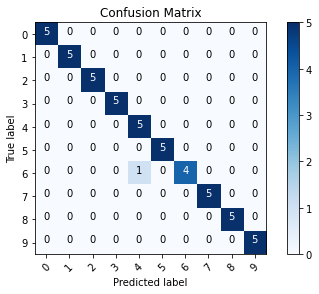

In [139]:
# Train the model for more epochs to see better results
cm_plot_labels = ['0','1','2','3','4','5','6','7','8','9']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

# Data Augmentation

Data augmentation occurs when you create new data based on modifications of your existing data. In our case, our data will be images. Data augmentation on images would include transformations like:
 - Flipping the image either horizontally or vertically
 - Rotating the image
 - Zooming in or out on the image
 - Cropping the image
 - Varying the color on the image

In [140]:
import matplotlib.pyplot as plt
import numpy as np
import os
import random
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
%matplotlib inline

In [141]:
# This function will plot images in the form of a grid with 1 row and 10 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

In [142]:
gen = ImageDataGenerator(rotation_range=10, width_shift_range=0.1, 
       height_shift_range=0.1, shear_range=0.15, zoom_range=0.1, 
       channel_shift_range=10., horizontal_flip=True)

In [143]:
chosen_image = random.choice(os.listdir('data/dogs-vs-cats/train/dog'))

In [144]:
image_path = 'data/dogs-vs-cats/train/dog/' + chosen_image

In [145]:
assert os.path.isfile(image_path)

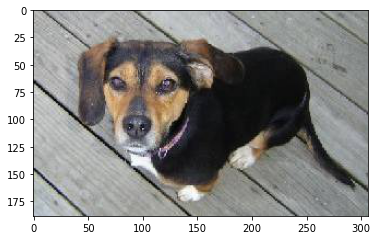

In [146]:
# Obtain image
image = np.expand_dims(plt.imread(image_path),0)
plt.imshow(image[0])

In [147]:
# Generate batches of augmented images from this image
aug_iter = gen.flow(image)

In [148]:
# Get 10 samples of augmented images
aug_images = [next(aug_iter)[0].astype(np.uint8) for i in range(10)]

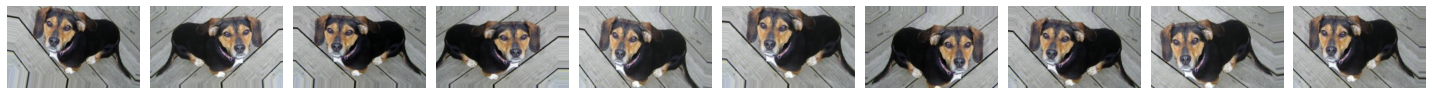

In [149]:
# Augmented images
plotImages(aug_images)